In [257]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [258]:
# load the data
data = pd.read_csv('/Users/chirath/Python/IIT/Waste_Management_System-DSGP-/ALL/Dataset22-24_cleaned_model_with_weekly_percentages.csv')

In [259]:
data.head()

,Dump Date,Route,SOW Wastage Amount (Kg),MSW Wastage Amount (Kg),Year,Month,Day of the Week,Week Number,MSW_Collected,SOW_Collected,MSW Average Weekly Waste Percentage,SOW Average Weekly Waste Percentage,msw_route_week,sow_route_week
0,2022-01-01,01 - VILAWALA,3200.0,0.0,2022,1,5,52,0,1,2.663138,2.037264,3.067591,1.606252
1,2022-01-01,29B - BORUPANA,0.0,3570.0,2022,1,5,52,1,0,2.663138,2.037264,2.460810,1.687400
2,2022-01-01,29A - KANDAWALA,2960.0,0.0,2022,1,5,52,0,1,2.663138,2.037264,2.153171,2.082449
3,2022-01-01,28 - RATMALANA EAST,2010.0,0.0,2022,1,5,52,0,1,2.663138,2.037264,2.983814,2.014985
4,2022-01-01,27 - RATMALANA WEST,0.0,1760.0,2022,1,5,52,1,0,2.663138,2.037264,3.781862,1.989268


In [260]:
# convert the Dump Date column to datetime
data['Dump Date'] = pd.to_datetime(data['Dump Date'])

In [261]:
# drop the columns 
data = data.drop(columns=['MSW Average Weekly Waste Percentage','SOW Average Weekly Waste Percentage', 'msw_route_week', 'sow_route_week', 'SOW Wastage Amount (Kg)', 'SOW_Collected'])

In [262]:
data.head()

,Dump Date,Route,MSW Wastage Amount (Kg),Year,Month,Day of the Week,Week Number,MSW_Collected
0,2022-01-01,01 - VILAWALA,0.0,2022,1,5,52,0
1,2022-01-01,29B - BORUPANA,3570.0,2022,1,5,52,1
2,2022-01-01,29A - KANDAWALA,0.0,2022,1,5,52,0
3,2022-01-01,28 - RATMALANA EAST,0.0,2022,1,5,52,0
4,2022-01-01,27 - RATMALANA WEST,1760.0,2022,1,5,52,1


In [263]:
# plot the MSW Amount above certain thresholds for each route
for route in data['Route'].unique():
    filtered_msw_data = data[(data['Year'] == 2022) & 
                         (data['Route'] == route) & 
                         (data['MSW Wastage Amount (Kg)'] > 5000)]
    
    if not filtered_msw_data.empty: 
        print(f"\n--- Route: {route} ---")
        print(filtered_msw_data)


--- Route: 01 - VILAWALA ---
      Dump Date          Route  MSW Wastage Amount (Kg)  Year  Month  \
1462 2022-02-25  01 - VILAWALA              5270.000000  2022      2   
2818 2022-04-19  01 - VILAWALA              5220.000000  2022      4   
3372 2022-05-12  01 - VILAWALA              5950.000000  2022      5   
3513 2022-05-17  01 - VILAWALA              5250.000000  2022      5   
4020 2022-06-04  01 - VILAWALA              5180.000000  2022      6   
4206 2022-06-11  01 - VILAWALA              5040.000000  2022      6   
4463 2022-06-23  01 - VILAWALA              5760.000000  2022      6   
4536 2022-06-27  01 - VILAWALA              5330.000000  2022      6   
4596 2022-06-30  01 - VILAWALA              5910.000000  2022      6   
4732 2022-07-07  01 - VILAWALA              5840.000000  2022      7   
5312 2022-08-08  01 - VILAWALA              6140.000000  2022      8   
5368 2022-08-10  01 - VILAWALA              5230.000000  2022      8   
5439 2022-08-15  01 - VILAWALA    

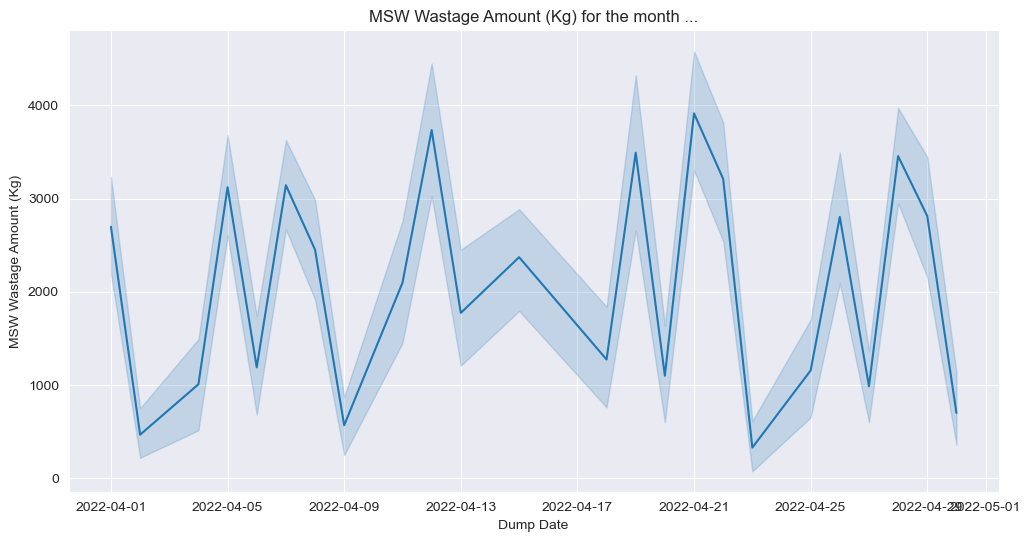

In [264]:
# plot the MSW Wastage Amount (Kg) for a month of a year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dump Date', y='MSW Wastage Amount (Kg)', data=data[(data['Dump Date'].dt.month == 4) & (data['Year'] == 2022)])
plt.title('MSW Wastage Amount (Kg) for the month ...')
plt.show()

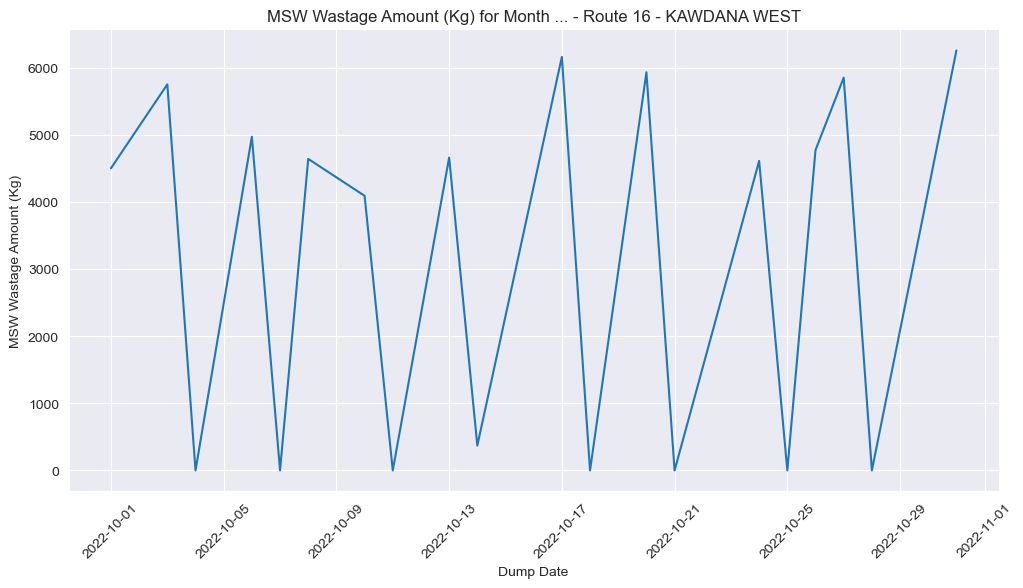

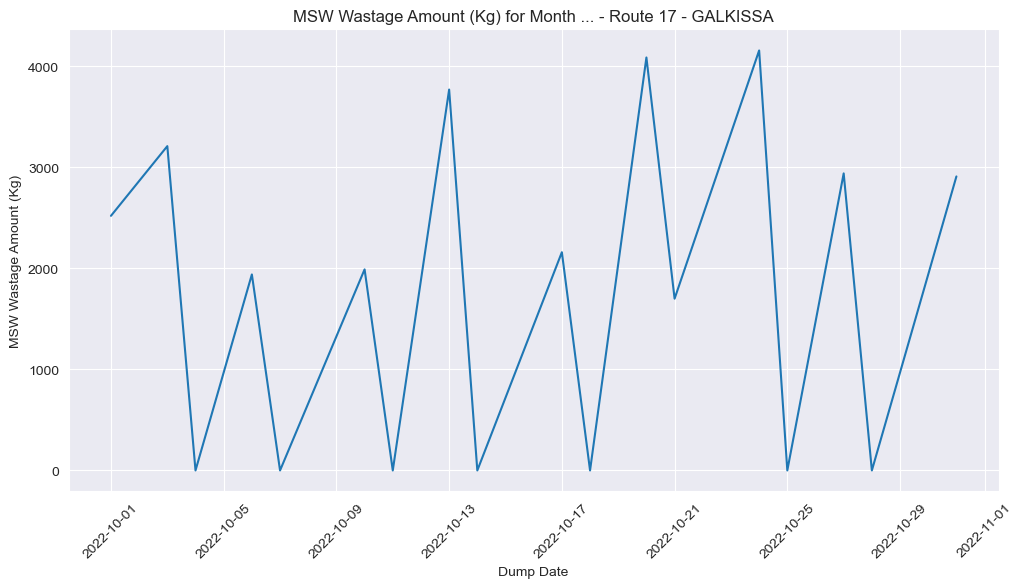

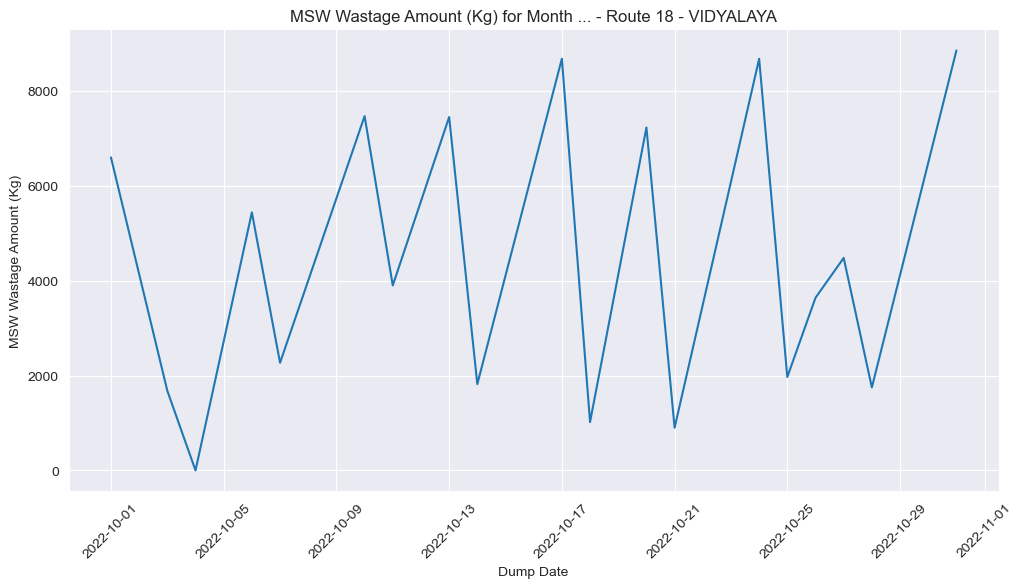

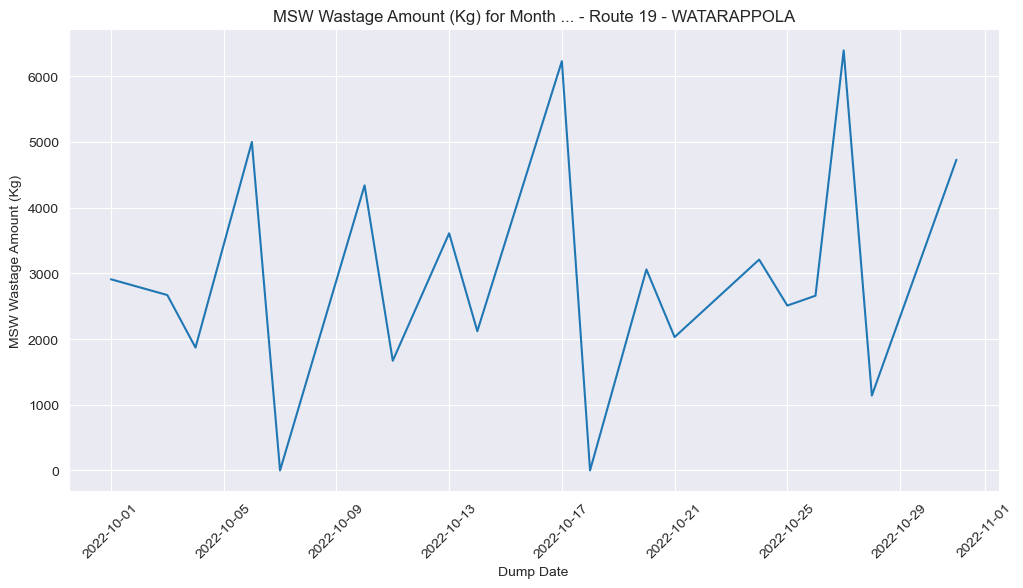

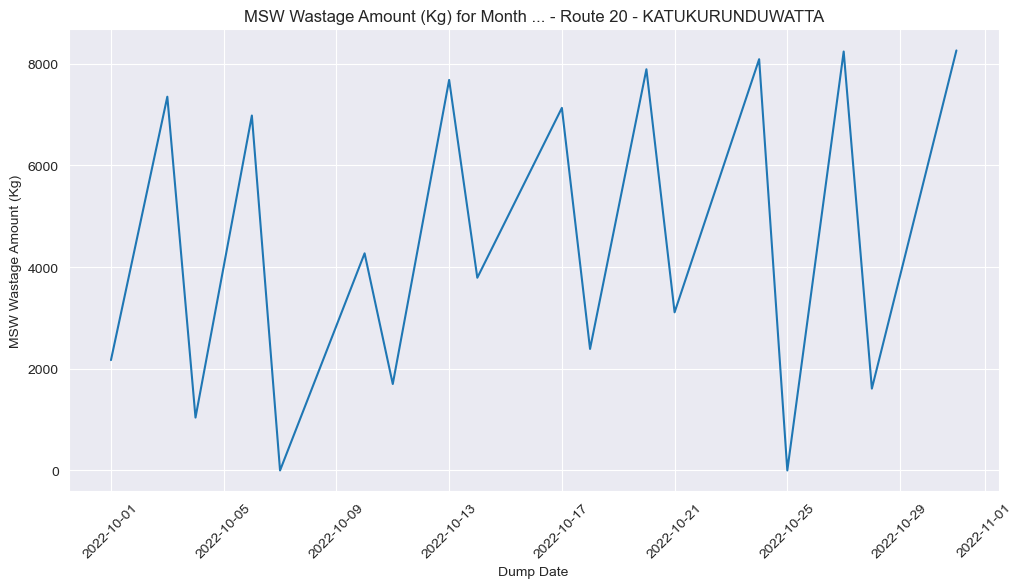

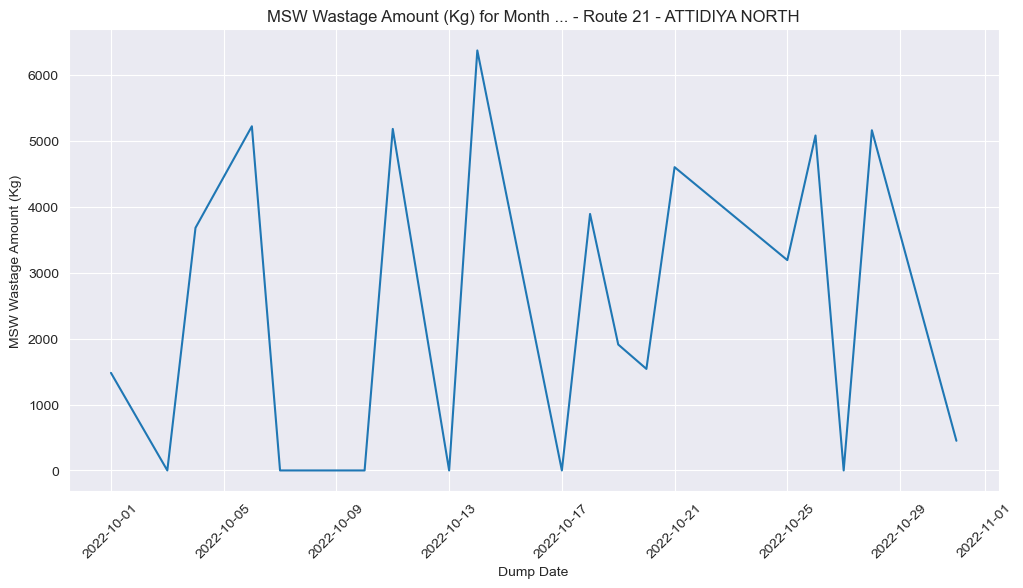

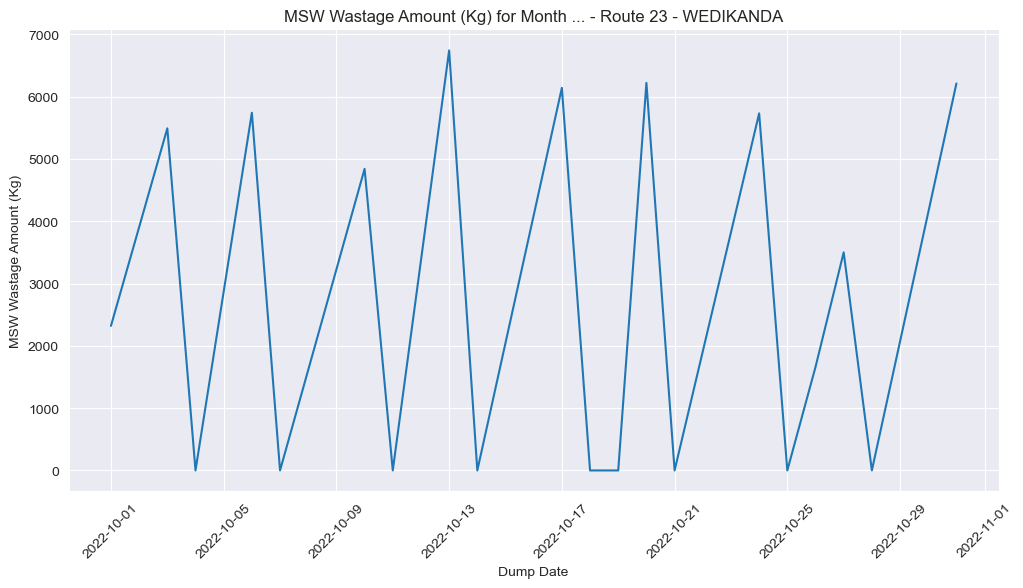

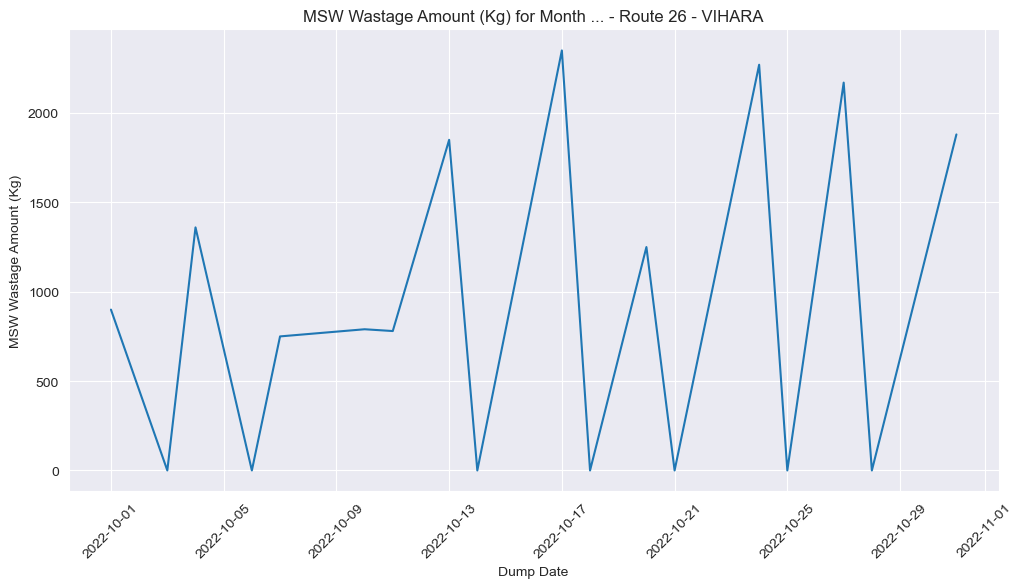

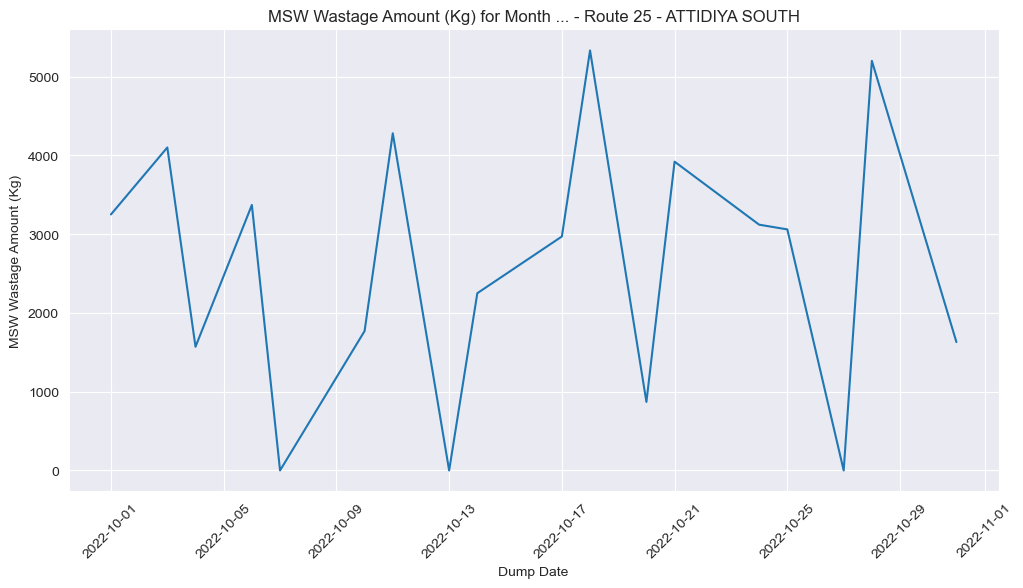

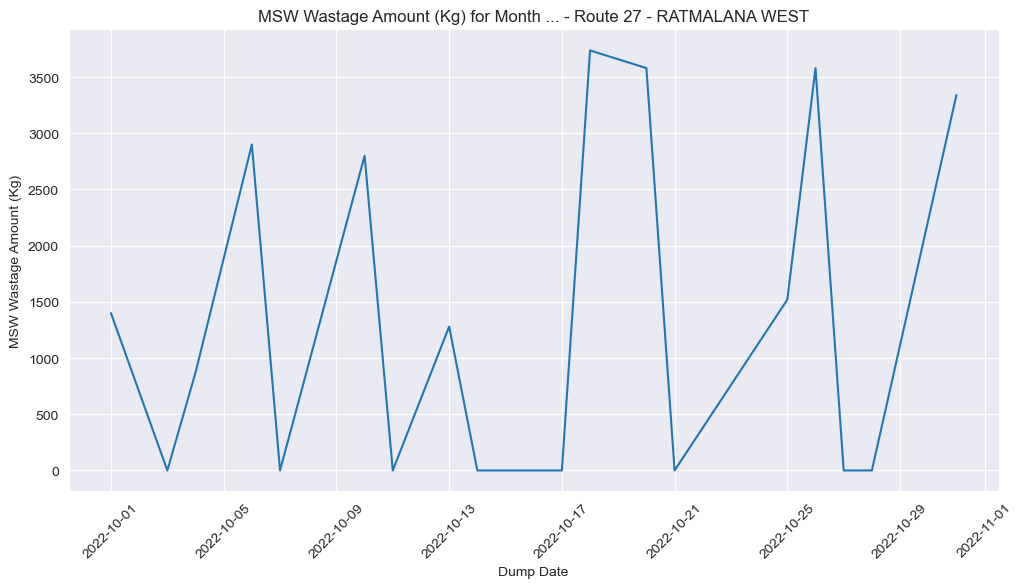

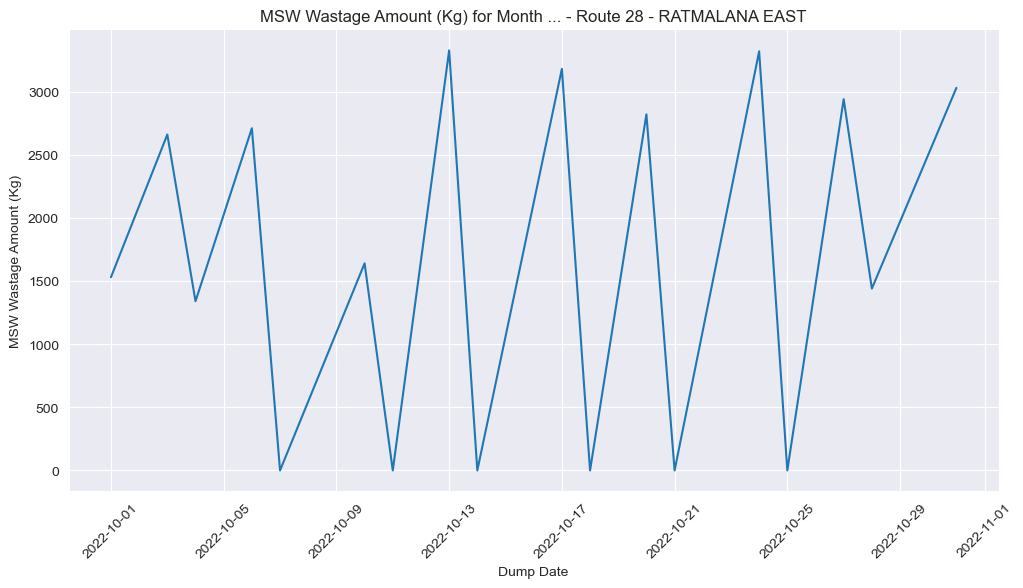

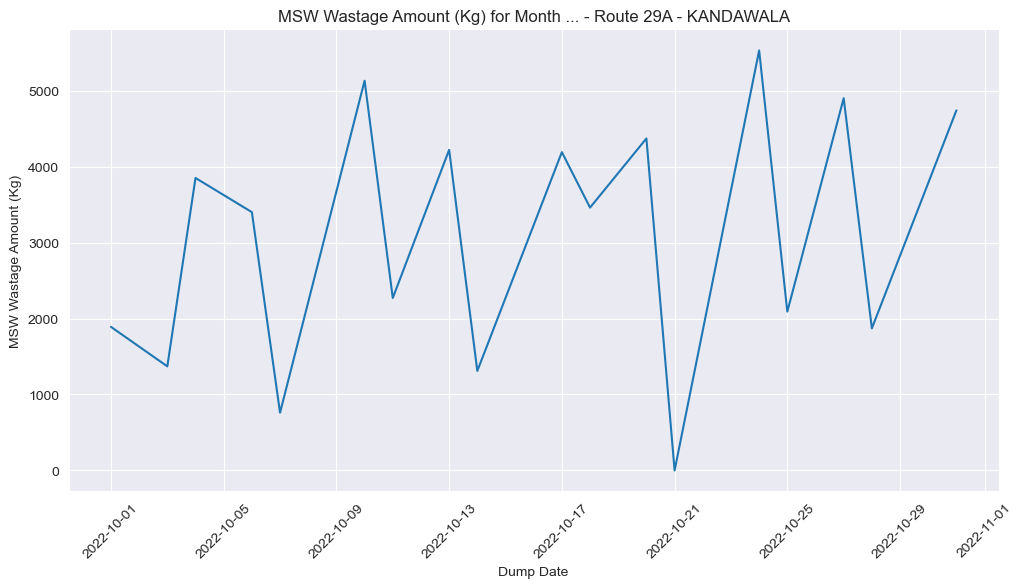

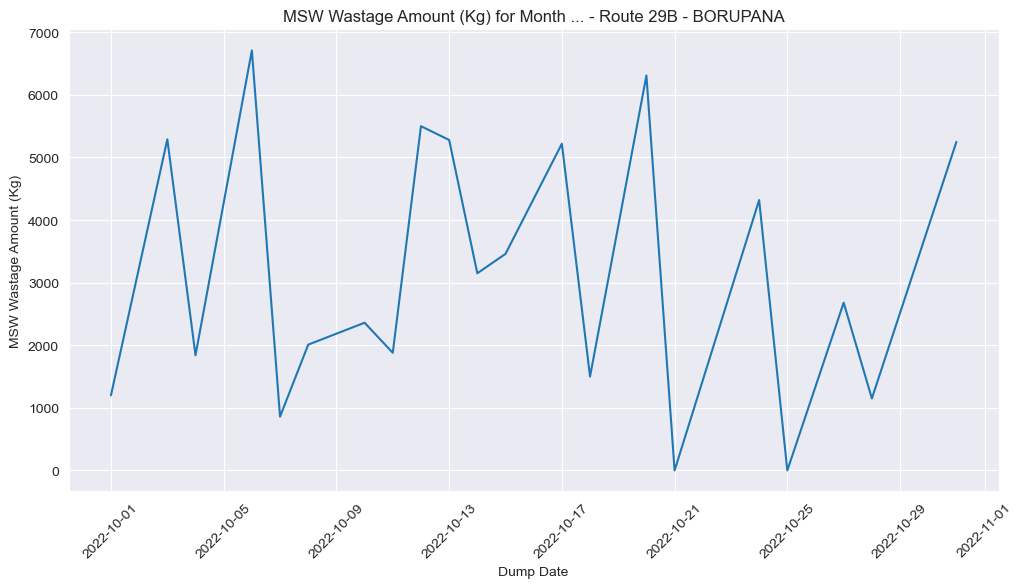

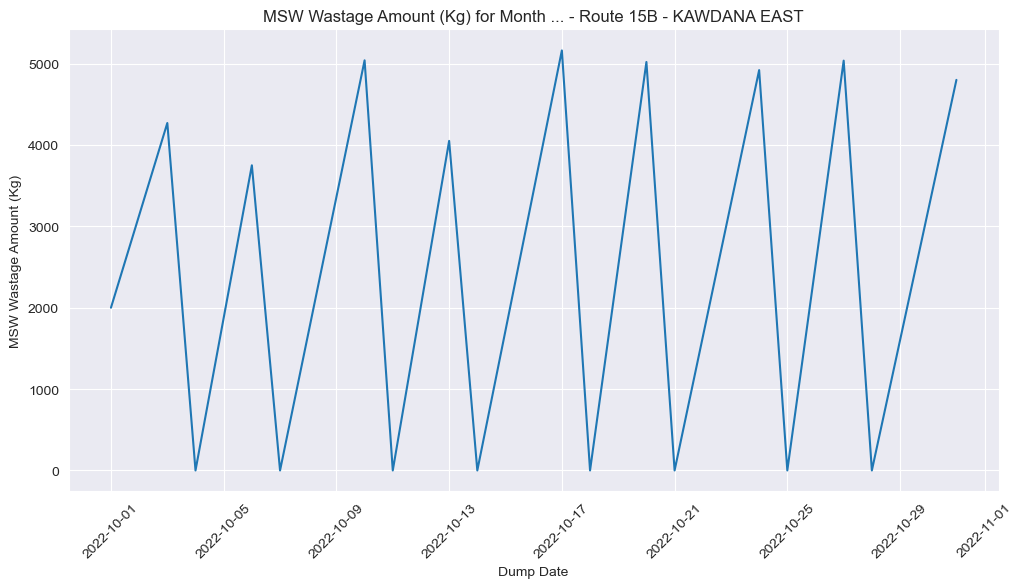

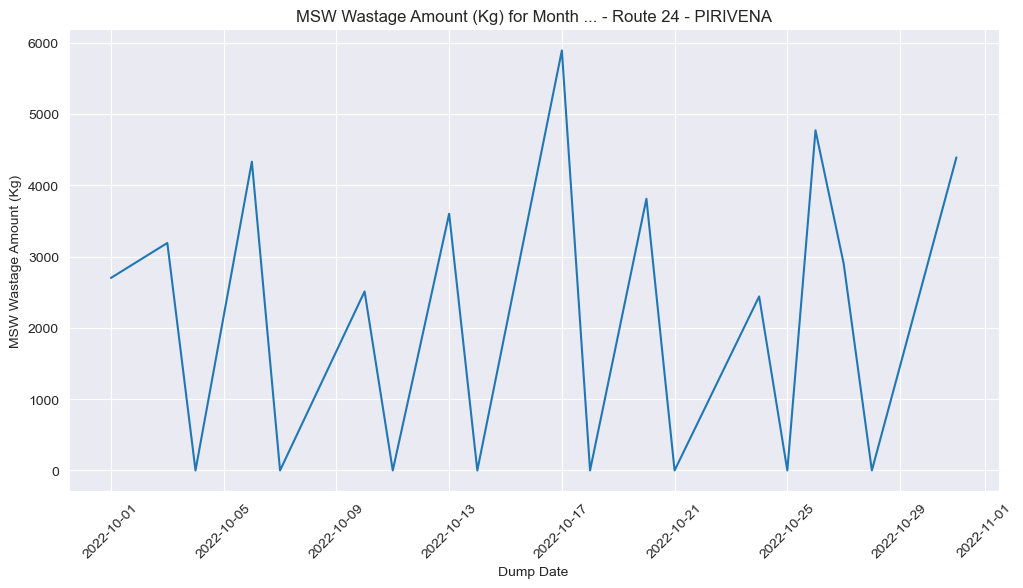

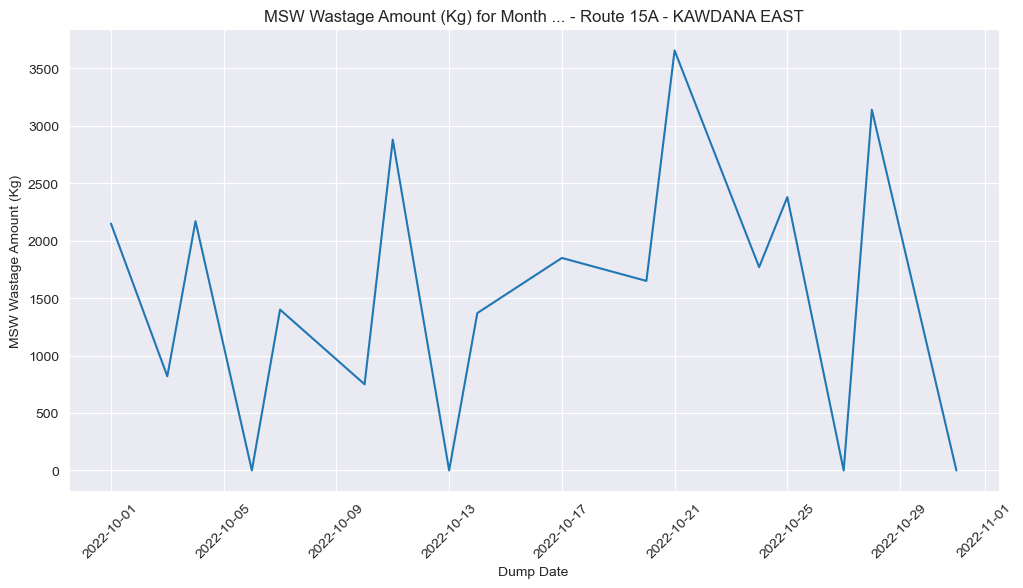

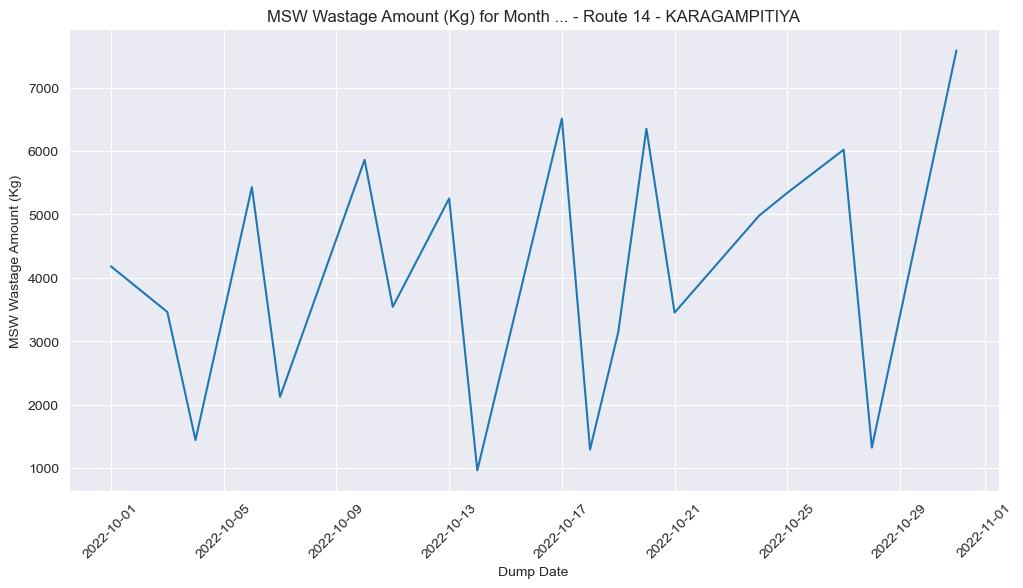

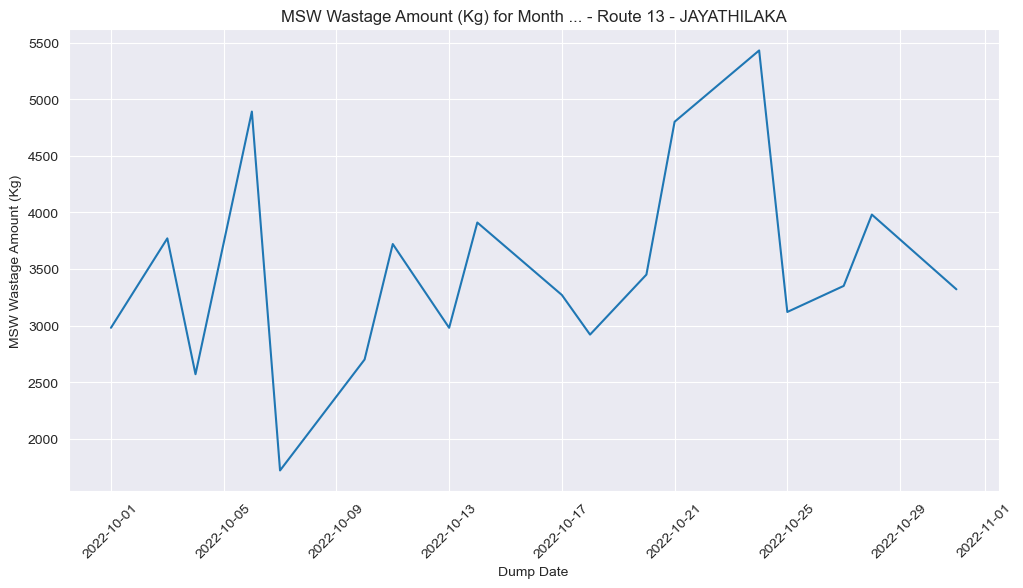

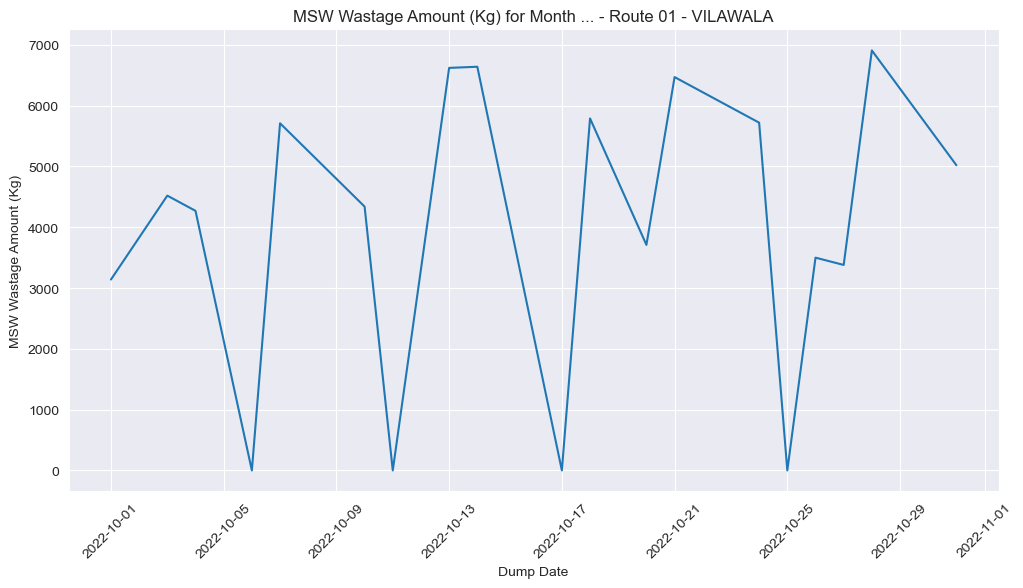

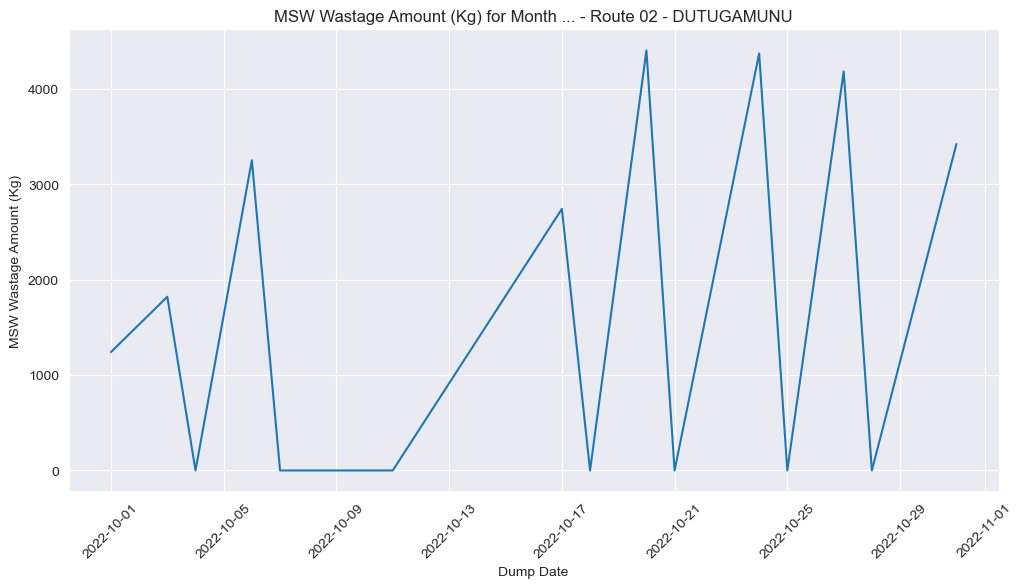

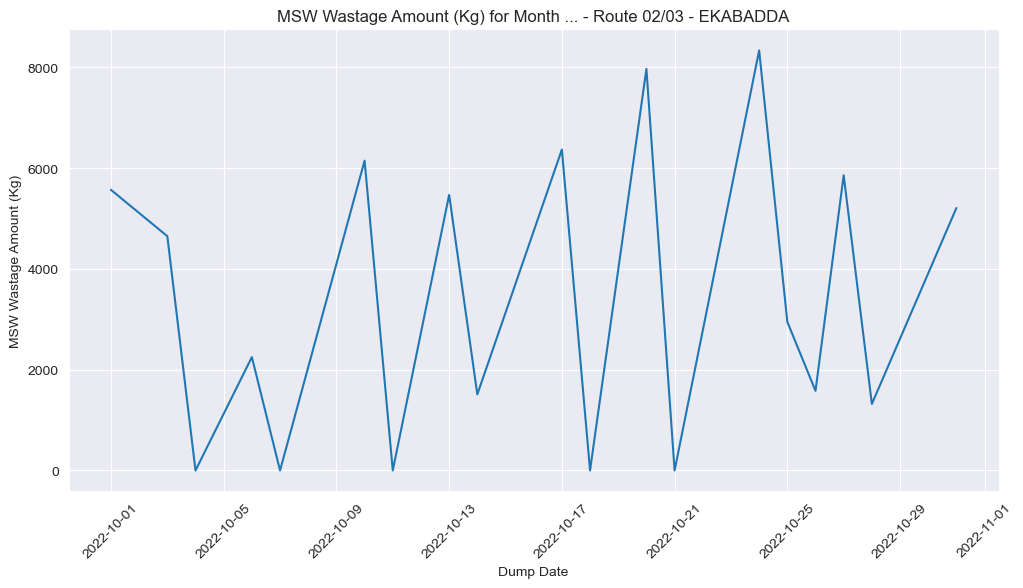

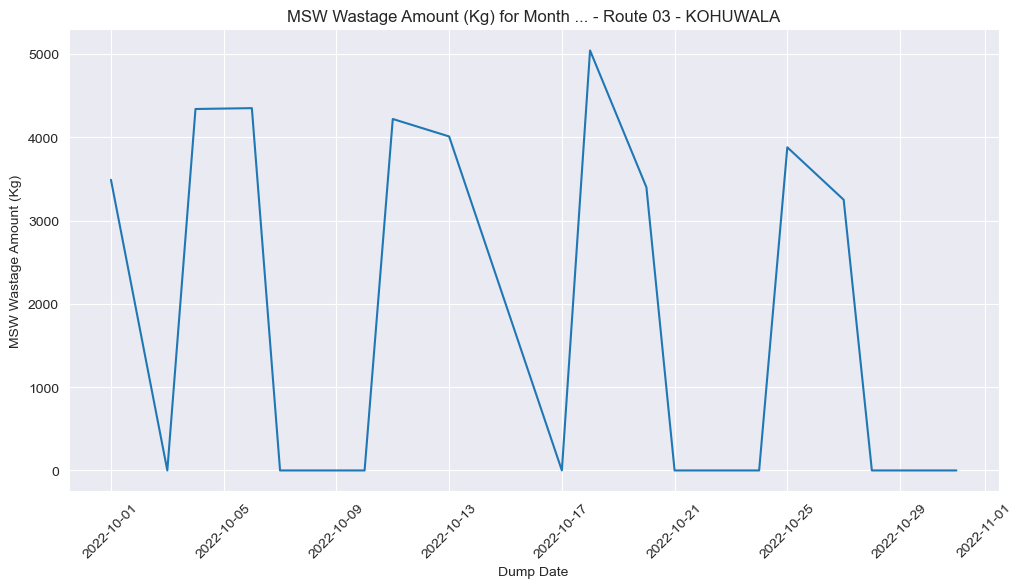

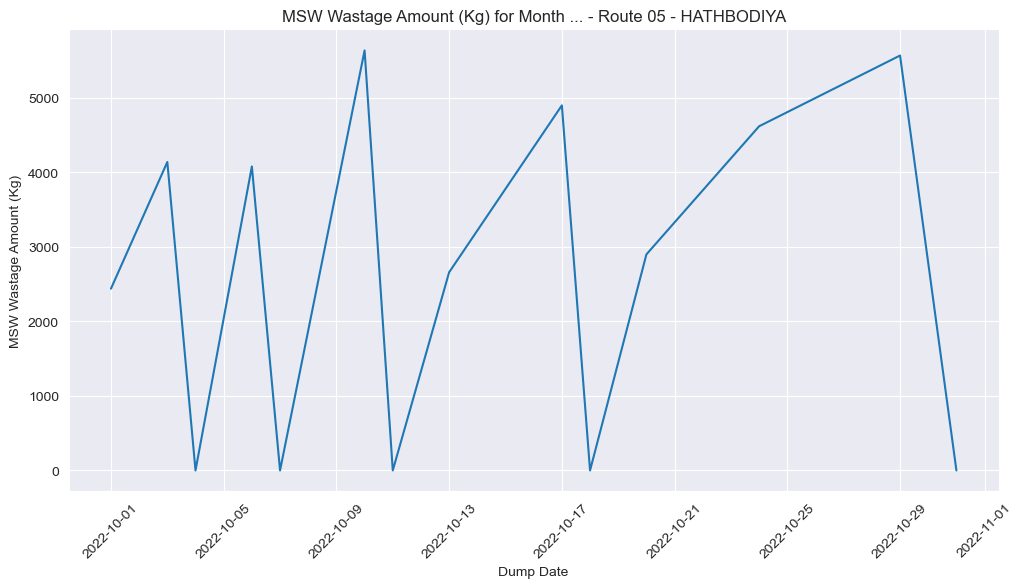

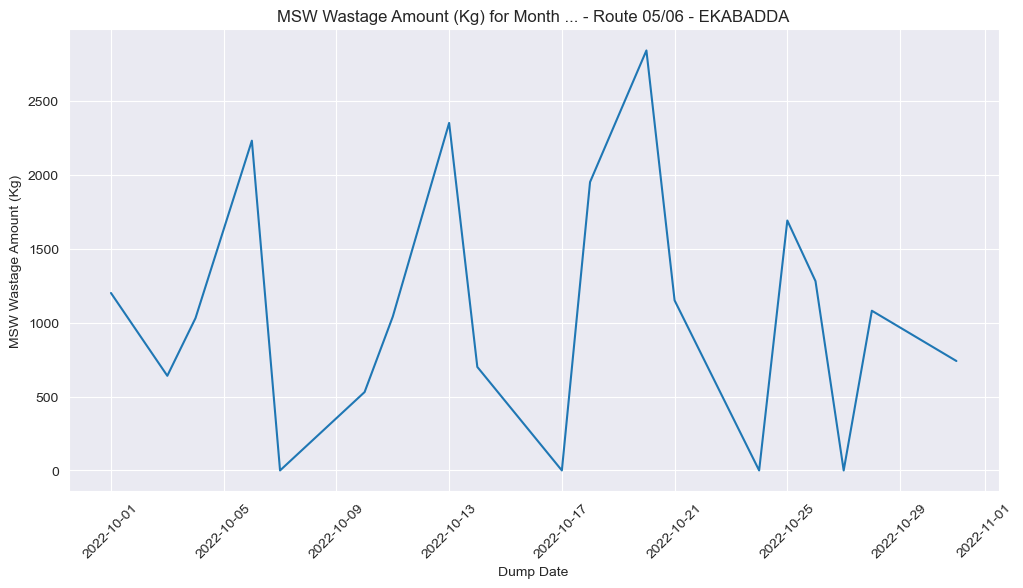

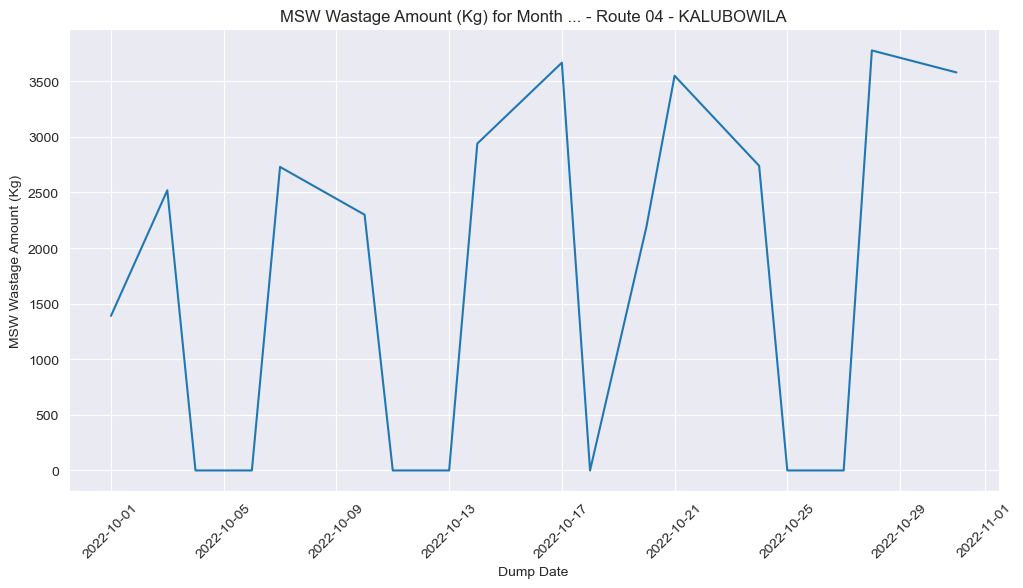

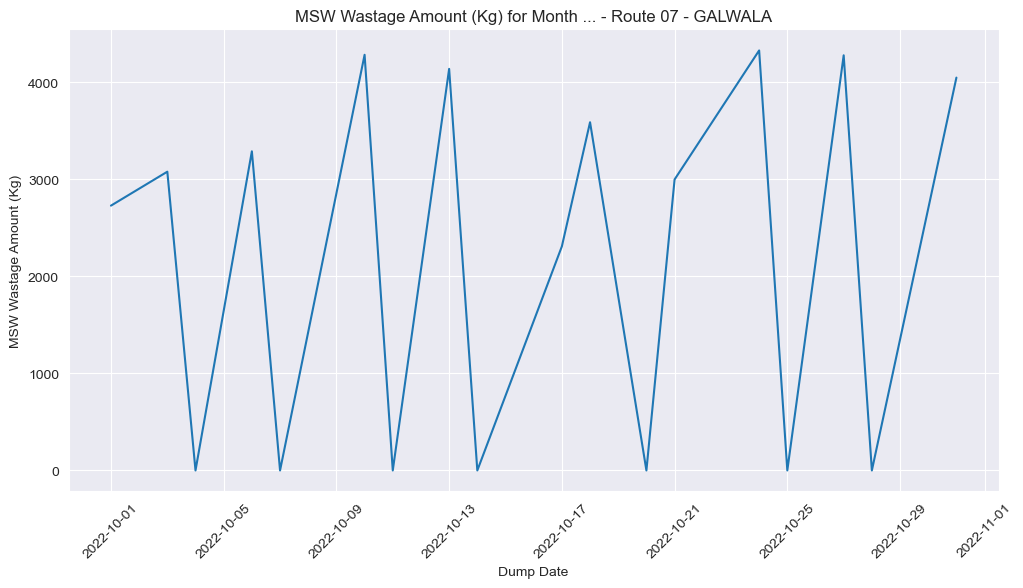

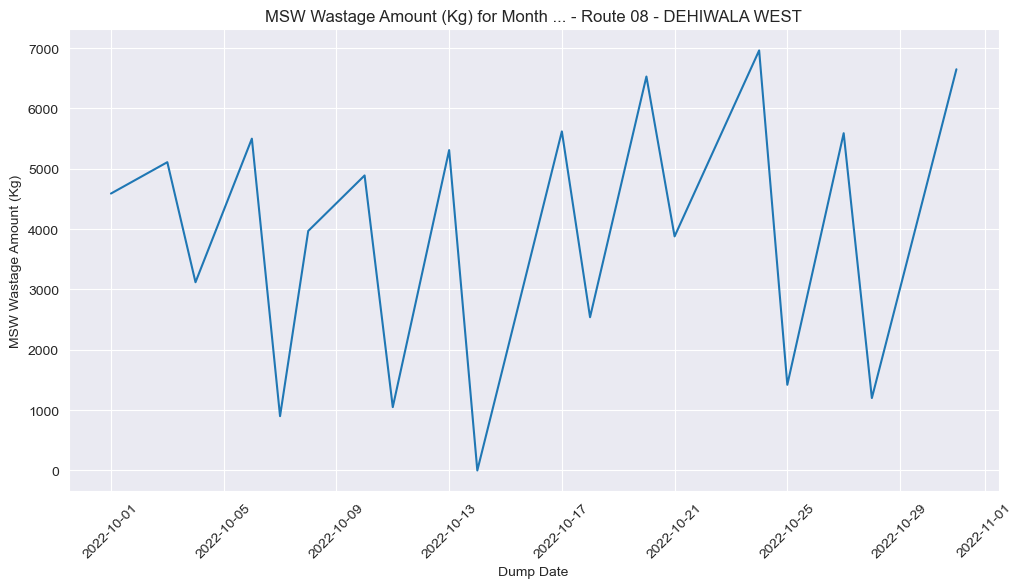

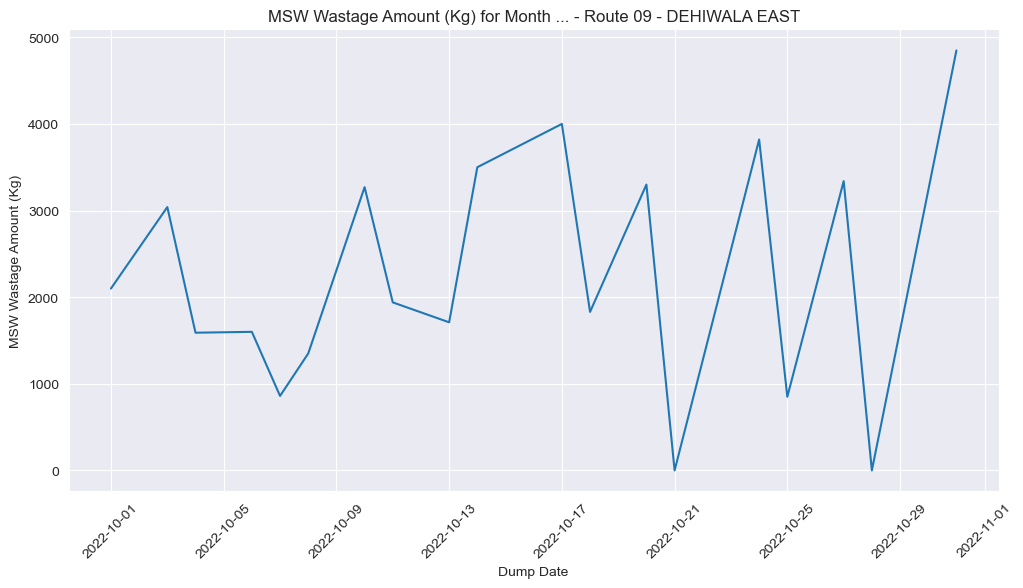

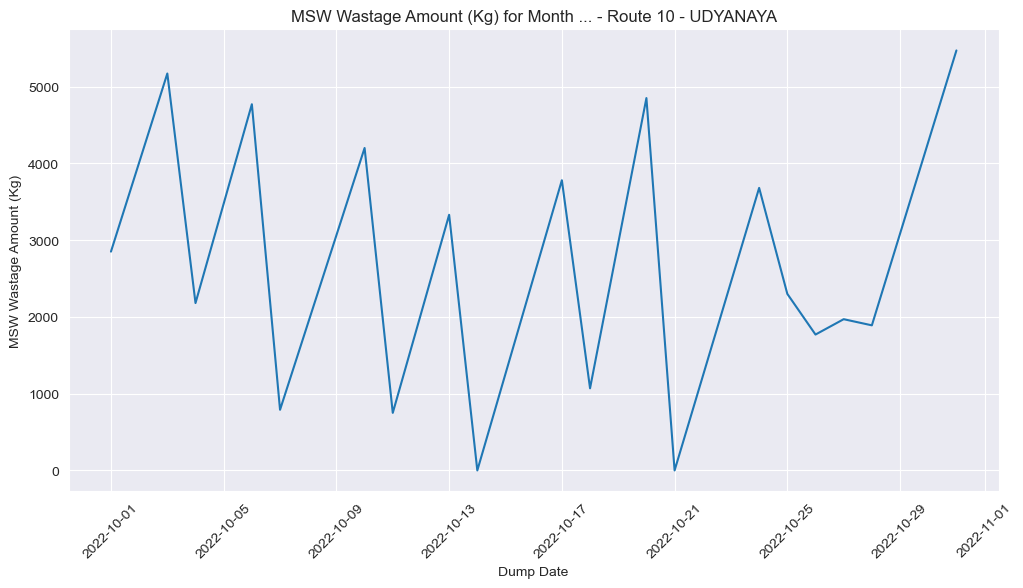

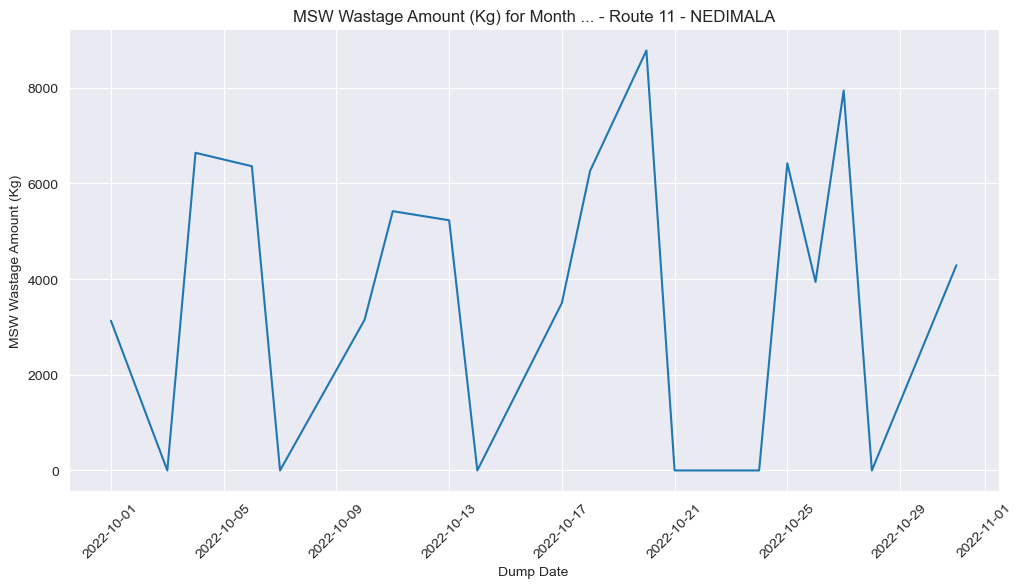

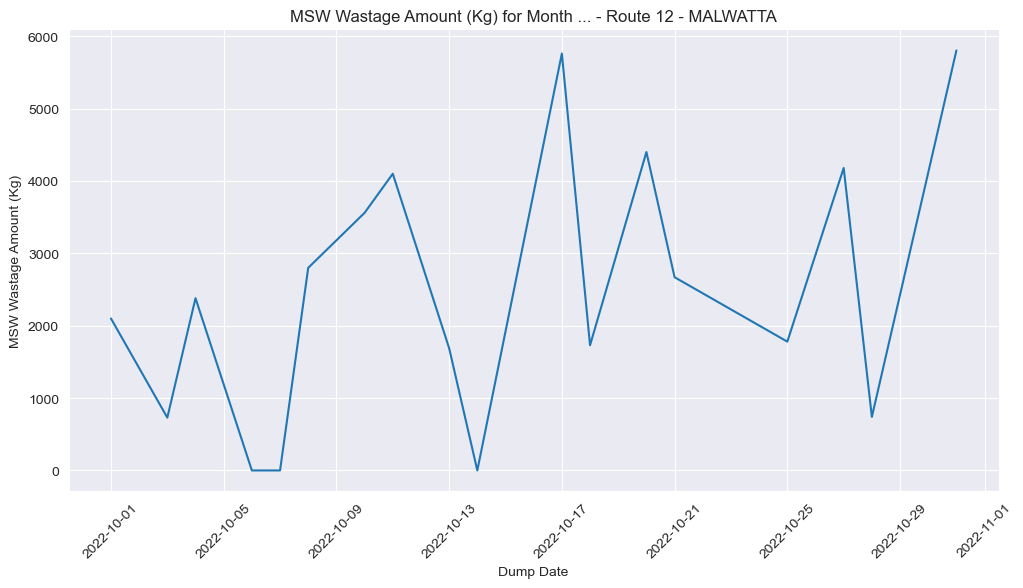

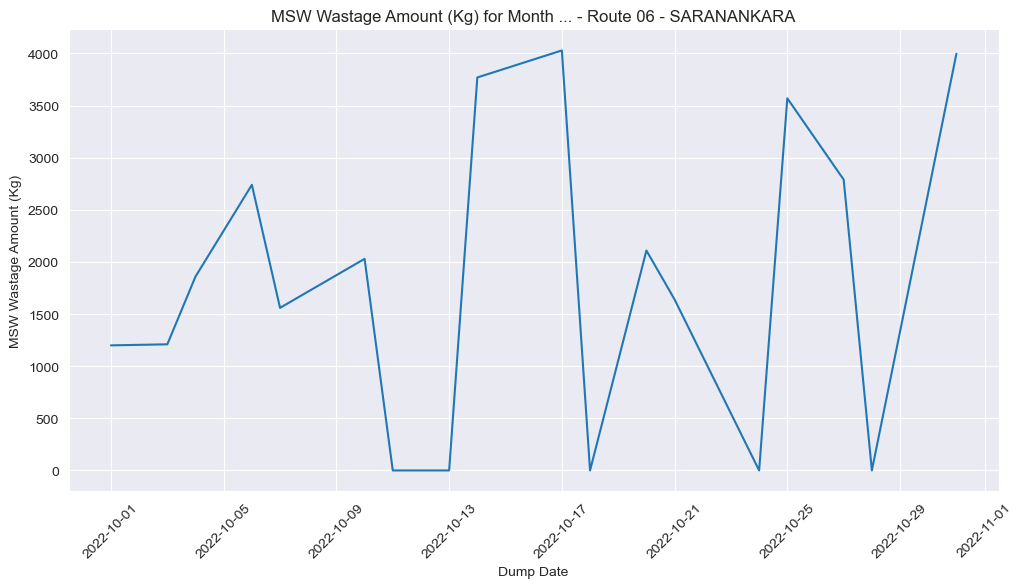

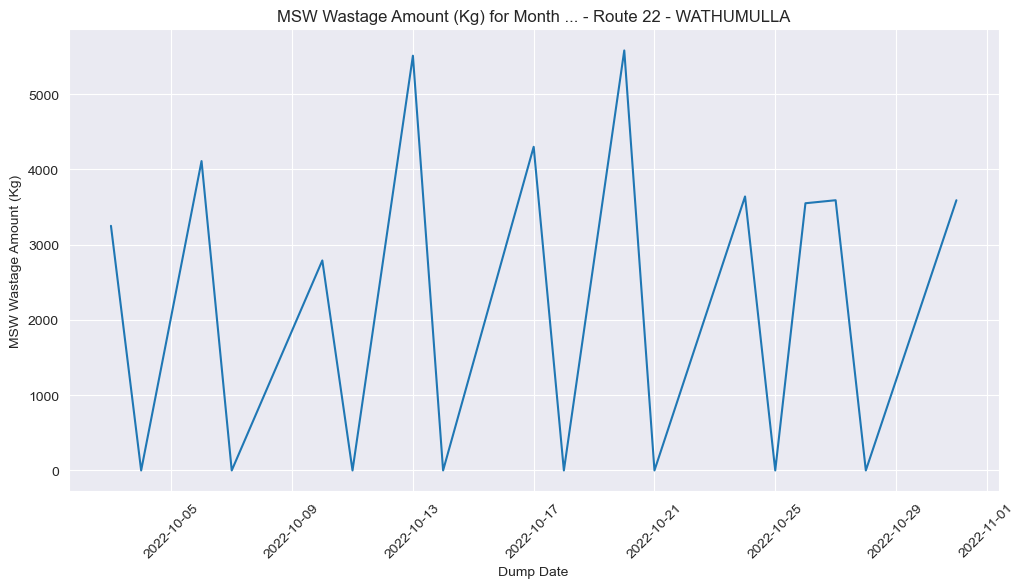

In [265]:
# Filter data for  Month and Year
filtered_msw_data = data[(data['Dump Date'].dt.month == 10) & (data['Year'] == 2022)]

# Plot for each unique route
for route in filtered_msw_data['Route'].unique():
    route_msw_data = filtered_msw_data[filtered_msw_data['Route'] == route]
    
    if not route_msw_data.empty:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Dump Date', y='MSW Wastage Amount (Kg)', data=route_msw_data)
        plt.title(f'MSW Wastage Amount (Kg) for Month ... - Route {route}')
        plt.xlabel('Dump Date')
        plt.ylabel('MSW Wastage Amount (Kg)')
        plt.xticks(rotation=45)
        plt.show()

In [266]:
for year in [2022, 2023, 2024]:
    for route in data['Route'].unique():
        # Filter data for the specific route and year
        route_msw_data = data[(data['Year'] == year) & (data['Route'] == route)]

        # Replace zeros with NaN for mean calculations
        data.loc[route_msw_data.index, 'MSW Wastage Amount (Kg)'] = data.loc[route_msw_data.index, 'MSW Wastage Amount (Kg)'].replace(0, np.nan)

        # Compute weekly average for this route and year
        weekly_avg = route_msw_data.groupby('Week Number')['MSW Wastage Amount (Kg)'].mean()

        # Identify indices where MSW > threshold
        outlier_indices = route_msw_data[route_msw_data['MSW Wastage Amount (Kg)'] > 6000].index

        # Replace outlier values with their respective weekly averages
        for idx in outlier_indices:
            week = data.loc[idx, 'Week Number']  
            avg_value = weekly_avg.get(week, np.nan)  

            # Replace only if the average is not NaN
            if not np.isnan(avg_value):
                old_value = data.at[idx, 'MSW Wastage Amount (Kg)']
                data.at[idx, 'MSW Wastage Amount (Kg)'] = avg_value
                print(f"Replaced Index {idx} (Route {route}, Year {year}, Week {week}) - Outlier {old_value} → {avg_value:.2f}")

# Display summary of replacements
print("\n--- Outliers Replaced with Weekly Averages ---")
print(data[data['MSW Wastage Amount (Kg)'] > 6000])

Replaced Index 5312 (Route 01 - VILAWALA, Year 2022, Week 32) - Outlier 6140.0 → 2842.50
Replaced Index 6618 (Route 01 - VILAWALA, Year 2022, Week 41) - Outlier 6621.024014110537 → 4400.26
Replaced Index 6655 (Route 01 - VILAWALA, Year 2022, Week 41) - Outlier 6640.0 → 4400.26
Replaced Index 6777 (Route 01 - VILAWALA, Year 2022, Week 42) - Outlier 6470.0 → 3992.50
Replaced Index 6926 (Route 01 - VILAWALA, Year 2022, Week 43) - Outlier 6907.985229749131 → 3901.60
Replaced Index 7114 (Route 01 - VILAWALA, Year 2022, Week 45) - Outlier 6830.178777756545 → 3400.04
Replaced Index 7301 (Route 01 - VILAWALA, Year 2022, Week 46) - Outlier 6610.0 → 3318.05
Replaced Index 7334 (Route 01 - VILAWALA, Year 2022, Week 46) - Outlier 6662.19435749545 → 3318.05
Replaced Index 7402 (Route 01 - VILAWALA, Year 2022, Week 47) - Outlier 6130.0 → 3190.00
Replaced Index 7621 (Route 01 - VILAWALA, Year 2022, Week 49) - Outlier 6651.576367398614 → 2930.39
Replaced Index 7870 (Route 01 - VILAWALA, Year 2022, Wee

In [267]:
for year in [2022, 2023, 2024]:
    for route in data['Route'].unique():
        # Filter data for the specific route and year
        route_msw_data = data[(data['Year'] == year) & (data['Route'] == route)]

        # Replace zeros with NaN for mean calculations
        data.loc[route_msw_data.index, 'MSW Wastage Amount (Kg)'] = data.loc[route_msw_data.index, 'MSW Wastage Amount (Kg)'].replace(0, np.nan)

        # Compute weekly average for this route and year
        weekly_avg = route_msw_data.groupby('Week Number')['MSW Wastage Amount (Kg)'].mean()

        # Identify indices where MSW > threshold
        outlier_indices = route_msw_data[route_msw_data['MSW Wastage Amount (Kg)'] > 6000].index

        # Replace outlier values with their respective weekly averages
        for idx in outlier_indices:
            week = data.loc[idx, 'Week Number']  
            avg_value = weekly_avg.get(week, np.nan)  

            # Replace only if the average is not NaN
            if not np.isnan(avg_value):
                old_value = data.at[idx, 'MSW Wastage Amount (Kg)']
                data.at[idx, 'MSW Wastage Amount (Kg)'] = avg_value
                print(f"Replaced Index {idx} (Route {route}, Year {year}, Week {week}) - Outlier {old_value} → {avg_value:.2f}")

# Display summary of replacements
print("\n--- Outliers Replaced with Weekly Averages ---")
print(data[data['MSW Wastage Amount (Kg)'] > 6000])

Replaced Index 7618 (Route 29B - BORUPANA, Year 2022, Week 49) - Outlier 6052.333593706651 → 4801.75
Replaced Index 7651 (Route 29B - BORUPANA, Year 2022, Week 49) - Outlier 6052.333593706651 → 4801.75
Replaced Index 7682 (Route 29B - BORUPANA, Year 2022, Week 49) - Outlier 6052.333593706651 → 4801.75
Replaced Index 4716 (Route 24 - PIRIVENA, Year 2022, Week 27) - Outlier 6222.702934715238 → 6222.70
Replaced Index 4755 (Route 24 - PIRIVENA, Year 2022, Week 27) - Outlier 6222.702934715238 → 6222.70
Replaced Index 4528 (Route 14 - KARAGAMPITIYA, Year 2022, Week 26) - Outlier 7100.0 → 7100.00
Replaced Index 4597 (Route 14 - KARAGAMPITIYA, Year 2022, Week 26) - Outlier 7100.0 → 7100.00

--- Outliers Replaced with Weekly Averages ---
      Dump Date               Route  MSW Wastage Amount (Kg)  Year  Month  \
4528 2022-06-27  14 - KARAGAMPITIYA              7100.000000  2022      6   
4597 2022-06-30  14 - KARAGAMPITIYA              7100.000000  2022      6   
4716 2022-07-07       24 - PIR

In [268]:
# dictionary to store percentages for each week
weekly_percentages_msw = defaultdict(list)

for year in [2022, 2023, 2024]:
    # data for the specific year
    yearly_data = data[data['Year'] == year]

    # total waste for the year
    annual_total_waste = yearly_data['MSW Wastage Amount (Kg)'].sum()

    # Group by week number and calculate the total waste per week
    weekly_totals = yearly_data.groupby('Week Number')['MSW Wastage Amount (Kg)'].sum()

    # percentage contribution for each week
    for week, weekly_total in weekly_totals.items():
        percentage = (weekly_total / annual_total_waste) * 100
        weekly_percentages_msw[week].append(percentage)

# average percentage for each week
average_weekly_percentages = {week: sum(percentages) / len(percentages) for week, percentages in weekly_percentages_msw.items()}

# weekly percentages
for week in sorted(average_weekly_percentages):
    print(f"Week {week}: {average_weekly_percentages[week]:.2f}%")

Week 1: 2.24%
Week 2: 2.36%
Week 3: 2.30%
Week 4: 2.14%
Week 5: 2.54%
Week 6: 1.82%
Week 7: 1.79%
Week 8: 2.17%
Week 9: 2.17%
Week 10: 2.07%
Week 11: 2.00%
Week 12: 2.12%
Week 13: 2.13%
Week 14: 2.15%
Week 15: 2.07%
Week 16: 2.15%
Week 17: 2.23%
Week 18: 1.89%
Week 19: 2.15%
Week 20: 2.46%
Week 21: 2.14%
Week 22: 2.08%
Week 23: 2.38%
Week 24: 2.13%
Week 25: 1.74%
Week 26: 2.20%
Week 27: 2.04%
Week 28: 1.98%
Week 29: 2.06%
Week 30: 2.09%
Week 31: 1.96%
Week 32: 2.06%
Week 33: 1.98%
Week 34: 1.90%
Week 35: 2.00%
Week 36: 2.22%
Week 37: 2.12%
Week 38: 1.74%
Week 39: 2.20%
Week 40: 1.30%
Week 41: 1.92%
Week 42: 2.05%
Week 43: 1.86%
Week 44: 2.49%
Week 45: 1.76%
Week 46: 2.01%
Week 47: 2.03%
Week 48: 1.92%
Week 49: 1.88%
Week 50: 2.01%
Week 51: 2.58%
Week 52: 2.62%


In [269]:
# custom changes to the dictionary
average_weekly_percentages[40] = 1.8

In [270]:
# add the weekly precetages to the data
data['MSW Average Weekly Waste Percentage'] = data['Week Number'].map(average_weekly_percentages)
print(data.head())

   Dump Date                Route  MSW Wastage Amount (Kg)  Year  Month  \
0 2022-01-01        01 - VILAWALA                      NaN  2022      1   
1 2022-01-01       29B - BORUPANA                   3570.0  2022      1   
2 2022-01-01      29A - KANDAWALA                      NaN  2022      1   
3 2022-01-01  28 - RATMALANA EAST                      NaN  2022      1   
4 2022-01-01  27 - RATMALANA WEST                   1760.0  2022      1   

   Day of the Week  Week Number  MSW_Collected  \
0                5           52              0   
1                5           52              1   
2                5           52              0   
3                5           52              0   
4                5           52              1   

   MSW Average Weekly Waste Percentage  
0                             2.618972  
1                             2.618972  
2                             2.618972  
3                             2.618972  
4                             2.618972  


In [271]:
# nested dictionary to store percentages per route per week
route_weekly_percentages_msw = defaultdict(lambda: defaultdict(list))

for year in [2022, 2023, 2024]:
    # data for the specific year
    yearly_data = data[data['Year'] == year]

    # Loop through each unique route
    for route in yearly_data['Route'].unique():
        # data for the specific route
        route_data = yearly_data[yearly_data['Route'] == route]

        # total waste for this route in that year
        total_route_waste = route_data['MSW Wastage Amount (Kg)'].sum()

        # Group by week number and calculate the total waste per week for this route
        weekly_totals = route_data.groupby('Week Number')['MSW Wastage Amount (Kg)'].sum()

        # percentage contribution for each week for this route
        for week, weekly_total in weekly_totals.items():
            percentage = (weekly_total / total_route_waste) * 100 if total_route_waste > 0 else 0
            route_weekly_percentages_msw[route][week].append(percentage)

# average weekly percentage for each route
average_route_weekly_percentages_msw = {
    route: {week: sum(percentages) / len(percentages) for week, percentages in weeks.items()}
    for route, weeks in route_weekly_percentages_msw.items()
}

# average weekly percentages per route
print("\n--- Average Weekly Percentages per Route (MSW) ---")
for route, weeks in average_route_weekly_percentages_msw.items():
    print(f"\nRoute {route}:")
    for week in sorted(weeks):
        print(f"  Week {week}: {weeks[week]:.2f}%")



--- Average Weekly Percentages per Route (MSW) ---

Route 01 - VILAWALA:
  Week 1: 1.73%
  Week 2: 2.57%
  Week 3: 2.26%
  Week 4: 2.25%
  Week 5: 2.27%
  Week 6: 1.84%
  Week 7: 1.45%
  Week 8: 2.24%
  Week 9: 1.96%
  Week 10: 2.33%
  Week 11: 1.50%
  Week 12: 2.33%
  Week 13: 2.01%
  Week 14: 2.23%
  Week 15: 2.30%
  Week 16: 2.08%
  Week 17: 1.92%
  Week 18: 1.70%
  Week 19: 1.79%
  Week 20: 2.39%
  Week 21: 1.85%
  Week 22: 1.88%
  Week 23: 2.17%
  Week 24: 2.25%
  Week 25: 2.17%
  Week 26: 2.28%
  Week 27: 2.04%
  Week 28: 1.94%
  Week 29: 2.16%
  Week 30: 2.12%
  Week 31: 1.73%
  Week 32: 2.14%
  Week 33: 2.10%
  Week 34: 1.56%
  Week 35: 2.31%
  Week 36: 2.15%
  Week 37: 2.07%
  Week 38: 1.58%
  Week 39: 1.93%
  Week 40: 2.24%
  Week 41: 2.41%
  Week 42: 2.22%
  Week 43: 2.47%
  Week 44: 2.16%
  Week 45: 1.79%
  Week 46: 1.87%
  Week 47: 2.15%
  Week 48: 2.48%
  Week 49: 1.69%
  Week 50: 2.02%
  Week 51: 3.17%
  Week 52: 2.86%

Route 29B - BORUPANA:
  Week 1: 2.17%
  Week 2: 2.

In [272]:
# map MSW percentages
def map_msw_percentage(row):
    route = row['Route']
    week = row['Week Number']
    return average_route_weekly_percentages_msw.get(route, {}).get(week, 0)  # Default to 0 if missing

# create a new column for the MSW route-week percentage
data['msw_route_week'] = data.apply(map_msw_percentage, axis=1)
# Display the first few rows to verify
print(data[['Route', 'Week Number', 'msw_route_week']].head())

                 Route  Week Number  msw_route_week
0        01 - VILAWALA           52        2.855855
1       29B - BORUPANA           52        2.476825
2      29A - KANDAWALA           52        2.153171
3  28 - RATMALANA EAST           52        2.983814
4  27 - RATMALANA WEST           52        3.781862


In [273]:
data.head(38)

,Dump Date,Route,MSW Wastage Amount (Kg),Year,Month,Day of the Week,Week Number,MSW_Collected,MSW Average Weekly Waste Percentage,msw_route_week
0,2022-01-01,01 - VILAWALA,NaN,2022,1,5,52,0,2.618972,2.855855
1,2022-01-01,29B - BORUPANA,3570.0,2022,1,5,52,1,2.618972,2.476825
2,2022-01-01,29A - KANDAWALA,NaN,2022,1,5,52,0,2.618972,2.153171
3,2022-01-01,28 - RATMALANA EAST,NaN,2022,1,5,52,0,2.618972,2.983814
4,2022-01-01,27 - RATMALANA WEST,1760.0,2022,1,5,52,1,2.618972,3.781862
5,2022-01-01,26 - VIHARA,NaN,2022,1,5,52,0,2.618972,2.396165
6,2022-01-01,25 - ATTIDIYA SOUTH,1060.0,2022,1,5,52,1,2.618972,2.431367
7,2022-01-01,24 - PIRIVENA,NaN,2022,1,5,52,0,2.618972,2.677208
8,2022-01-01,23 - WEDIKANDA,NaN,2022,1,5,52,0,2.618972,3.028831
9,2022-01-01,21 - ATTIDIYA NORTH,NaN,2022,1,5,52,0,2.618972,3.128785


In [274]:
# convert the Dump Date to datetime
data['Dump Date'] = pd.to_datetime(data['Dump Date'])

In [275]:
# sort the data by Dump Date and Route and reset the index
data = data.sort_values(by=['Dump Date', 'Route']).reset_index(drop=True)
print(data.head(38))

    Dump Date                  Route  MSW Wastage Amount (Kg)  Year  Month  \
0  2022-01-01          01 - VILAWALA                      NaN  2022      1   
1  2022-01-01        02 - DUTUGAMUNU                      NaN  2022      1   
2  2022-01-01       02/03 - EKABADDA                    970.0  2022      1   
3  2022-01-01          03 - KOHUWALA                      NaN  2022      1   
4  2022-01-01        04 - KALUBOWILA                      NaN  2022      1   
5  2022-01-01        05 - HATHBODIYA                      NaN  2022      1   
6  2022-01-01       06 - SARANANKARA                      NaN  2022      1   
7  2022-01-01           07 - GALWALA                   1180.0  2022      1   
8  2022-01-01     08 - DEHIWALA WEST                      NaN  2022      1   
9  2022-01-01     09 - DEHIWALA EAST                      NaN  2022      1   
10 2022-01-01          10 - UDYANAYA                      NaN  2022      1   
11 2022-01-01          11 - NEDIMALA                      NaN  2

In [276]:
# fill the zero values in the MSW Wastage Amount (Kg) column with the NaN values
data['MSW Wastage Amount (Kg)'] = data['MSW Wastage Amount (Kg)'].replace(0, np.nan)

In [277]:
data.head(38)

,Dump Date,Route,MSW Wastage Amount (Kg),Year,Month,Day of the Week,Week Number,MSW_Collected,MSW Average Weekly Waste Percentage,msw_route_week
0,2022-01-01,01 - VILAWALA,NaN,2022,1,5,52,0,2.618972,2.855855
1,2022-01-01,02 - DUTUGAMUNU,NaN,2022,1,5,52,0,2.618972,2.337420
2,2022-01-01,02/03 - EKABADDA,970.0,2022,1,5,52,1,2.618972,2.214391
3,2022-01-01,03 - KOHUWALA,NaN,2022,1,5,52,0,2.618972,2.719311
4,2022-01-01,04 - KALUBOWILA,NaN,2022,1,5,52,0,2.618972,2.599338
5,2022-01-01,05 - HATHBODIYA,NaN,2022,1,5,52,0,2.618972,2.773182
6,2022-01-01,06 - SARANANKARA,NaN,2022,1,5,52,0,2.618972,2.987682
7,2022-01-01,07 - GALWALA,1180.0,2022,1,5,52,1,2.618972,2.734965
8,2022-01-01,08 - DEHIWALA WEST,NaN,2022,1,5,52,0,2.618972,2.244373
9,2022-01-01,09 - DEHIWALA EAST,NaN,2022,1,5,52,0,2.618972,2.720410


In [278]:
# group by Routes to calculate lag and rolling features
route_groups = data.groupby('Route')

In [279]:
route_groups.head()

,Dump Date,Route,MSW Wastage Amount (Kg),Year,Month,Day of the Week,Week Number,MSW_Collected,MSW Average Weekly Waste Percentage,msw_route_week
0,2022-01-01,01 - VILAWALA,NaN,2022,1,5,52,0,2.618972,2.855855
1,2022-01-01,02 - DUTUGAMUNU,NaN,2022,1,5,52,0,2.618972,2.337420
2,2022-01-01,02/03 - EKABADDA,970.0,2022,1,5,52,1,2.618972,2.214391
3,2022-01-01,03 - KOHUWALA,NaN,2022,1,5,52,0,2.618972,2.719311
4,2022-01-01,04 - KALUBOWILA,NaN,2022,1,5,52,0,2.618972,2.599338
...,...,...,...,...,...,...,...,...,...,...
160,2022-01-06,28 - RATMALANA EAST,2060.0,2022,1,3,1,1,2.243628,2.653315
161,2022-01-06,29A - KANDAWALA,3880.0,2022,1,3,1,1,2.243628,2.615599
162,2022-01-06,29B - BORUPANA,4140.0,2022,1,3,1,1,2.243628,2.168382
168,2022-01-07,05/06 - EKABADDA,NaN,2022,1,4,1,0,2.243628,2.613100


In [280]:
# define the lag and rolling windows
lag_days = [1, 7]
rolling_windows = [7, 14, 30]

In [281]:
# add lag features
for lag in lag_days:
    data[f'MSW_lag_{lag}'] = route_groups['MSW Wastage Amount (Kg)'].shift(lag)

In [282]:
# add rolling statistics
for window in rolling_windows:
    data[f'MSW_rolling_mean_{window}'] = route_groups['MSW Wastage Amount (Kg)'].rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    data[f'MSW_rolling_min_{window}'] = route_groups['MSW Wastage Amount (Kg)'].rolling(window=window, min_periods=1).min().reset_index(0, drop=True)
    data[f'MSW_rolling_max_{window}'] = route_groups['MSW Wastage Amount (Kg)'].rolling(window=window, min_periods=1).max().reset_index(0, drop=True)

In [283]:
# Fill the NaN values in MSW Wastage Amount (Kg) column with the zero values
data['MSW Wastage Amount (Kg)'] = data['MSW Wastage Amount (Kg)'].fillna(0)

In [284]:
# drop the rows with NaN values after adding lag and rolling features and reset the index
data = data.dropna().reset_index(drop=True)

In [285]:
data.head(38)

,Dump Date,Route,MSW Wastage Amount (Kg),Year,Month,Day of the Week,Week Number,MSW_Collected,MSW Average Weekly Waste Percentage,msw_route_week,...,MSW_lag_7,MSW_rolling_mean_7,MSW_rolling_min_7,MSW_rolling_max_7,MSW_rolling_mean_14,MSW_rolling_min_14,MSW_rolling_max_14,MSW_rolling_mean_30,MSW_rolling_min_30,MSW_rolling_max_30
0,2022-01-10,13 - JAYATHILAKA,2560.0,2022,1,0,2,1,2.363996,2.403118,...,1360.000000,2677.142857,1460.0,4480.0,2512.500000,1360.000000,4480.000000,2512.500000,1360.000000,4480.000000
1,2022-01-10,19 - WATARAPPOLA,0.0,2022,1,0,2,0,2.363996,2.459840,...,1710.000000,2268.000000,950.0,3940.0,2175.000000,950.000000,3940.000000,2175.000000,950.000000,3940.000000
2,2022-01-10,25 - ATTIDIYA SOUTH,790.0,2022,1,0,2,1,2.363996,2.181902,...,1060.000000,2150.000000,790.0,5130.0,2013.750000,790.000000,5130.000000,2013.750000,790.000000,5130.000000
3,2022-01-11,02/03 - EKABADDA,1290.0,2022,1,1,2,1,2.363996,2.289852,...,3180.000000,3165.333333,1290.0,3980.0,2853.809524,970.000000,3980.000000,2853.809524,970.000000,3980.000000
4,2022-01-11,08 - DEHIWALA WEST,5050.0,2022,1,1,2,1,2.363996,2.226479,...,2300.000000,3790.000000,2250.0,5050.0,3577.142857,2250.000000,5050.000000,3577.142857,2250.000000,5050.000000
5,2022-01-11,09 - DEHIWALA EAST,2300.0,2022,1,1,2,1,2.363996,2.157880,...,2100.000000,2228.333333,1330.0,3040.0,2210.000000,1330.000000,3040.000000,2210.000000,1330.000000,3040.000000
6,2022-01-11,10 - UDYANAYA,4530.0,2022,1,1,2,1,2.363996,2.225137,...,4720.000000,2471.666667,840.0,4530.0,2792.857143,840.000000,4720.000000,2792.857143,840.000000,4720.000000
7,2022-01-11,13 - JAYATHILAKA,2910.0,2022,1,1,2,1,2.363996,2.403118,...,3210.000000,2634.285714,1460.0,4480.0,2556.666667,1360.000000,4480.000000,2556.666667,1360.000000,4480.000000
8,2022-01-11,14 - KARAGAMPITIYA,5710.0,2022,1,1,2,1,2.363996,2.410589,...,2650.000000,2678.571429,1160.0,5710.0,2675.000000,1160.000000,5710.000000,2675.000000,1160.000000,5710.000000
9,2022-01-11,16 - KAWDANA WEST,0.0,2022,1,1,2,0,2.363996,2.724571,...,1700.000000,3203.333333,1580.0,4990.0,2988.571429,1580.000000,4990.000000,2988.571429,1580.000000,4990.000000


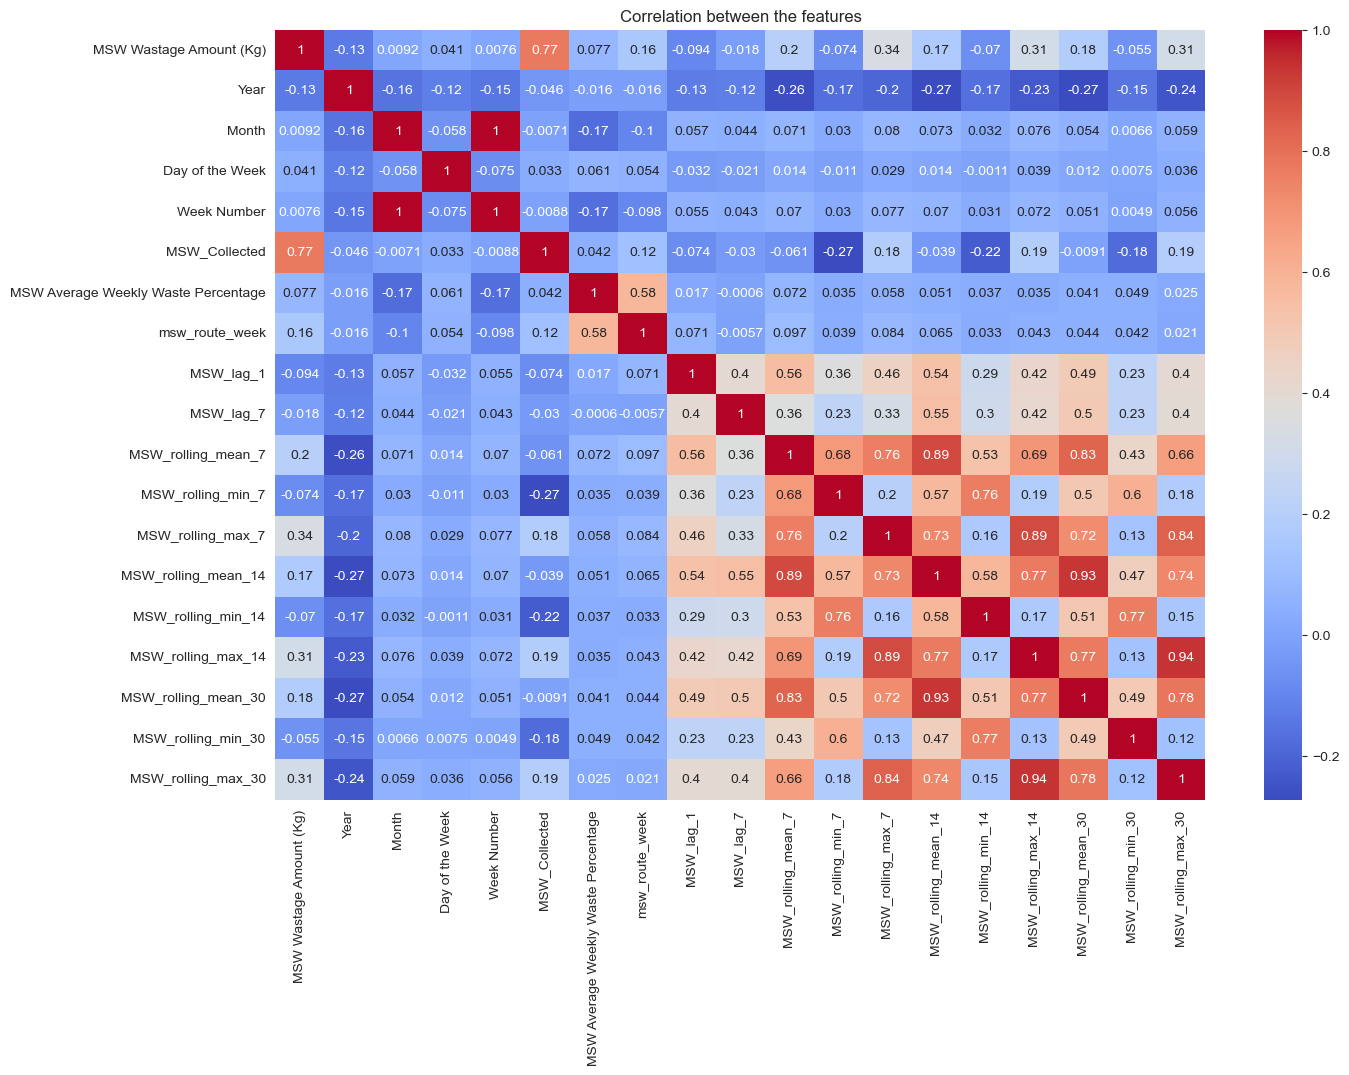

In [286]:
# visualze the correlation between the features
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the features')
plt.show()

In [287]:
# data columns
data.columns

Index(['Dump Date', 'Route', 'MSW Wastage Amount (Kg)', 'Year', 'Month',
       'Day of the Week', 'Week Number', 'MSW_Collected',
       'MSW Average Weekly Waste Percentage', 'msw_route_week', 'MSW_lag_1',
       'MSW_lag_7', 'MSW_rolling_mean_7', 'MSW_rolling_min_7',
       'MSW_rolling_max_7', 'MSW_rolling_mean_14', 'MSW_rolling_min_14',
       'MSW_rolling_max_14', 'MSW_rolling_mean_30', 'MSW_rolling_min_30',
       'MSW_rolling_max_30'],
      dtype='object')

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ route_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ route_embedding     │ (None, 1, 20)     │        660 │ route_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 20)        │          0 │ route_embedding[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ other_input         │ (None, 21)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenated_featu… │ (None, 41)        │          0 │ flatten_8[0][0],  │
│ (Concatenate)       │                   │            │ other_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_256 (Dense)   │ (None, 256)       │     10,752 │ concatenated_fea… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_256         │ (None, 256)       │          0 │ dense_256[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_128 (Dense)   │ (None, 128)       │     32,896 │ dropout_256[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_128         │ (None, 128)       │          0 │ dense_128[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 64)        │      8,256 │ dropout_128[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_64          │ (None, 64)        │          0 │ dense_64[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 32)        │      2,080 │ dropout_64[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_32          │ (None, 32)        │          0 │ dense_32[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ dropout_32[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 54,677 (213.58 KB)

 Trainable params: 54,677 (213.58 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3297663.5000 - val_loss: 679838.0000
Epoch 2/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 850871.7500 - val_loss: 559742.5625
Epoch 3/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 784281.4375 - val_loss: 550122.3125
Epoch 4/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 756810.6250 - val_loss: 544347.9375
Epoch 5/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 722834.5625 - val_loss: 526579.0000
Epoch 6/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 762042.1250 - val_loss: 524328.0000
Epoch 7/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 737485.6875 - val_loss: 533657.9375
Epoch 8/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 757848.1875 - val_loss: 522797.6875
Epoch 9/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 737775.3125 - val_loss: 522308.1250
Epoch 10/500
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 742386.2500 - val_loss: 504879.9688
Epoch 11/500
286/286 ━━

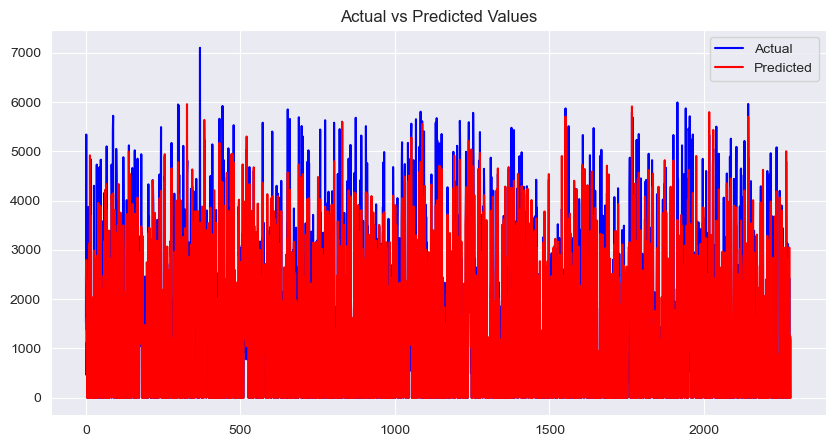

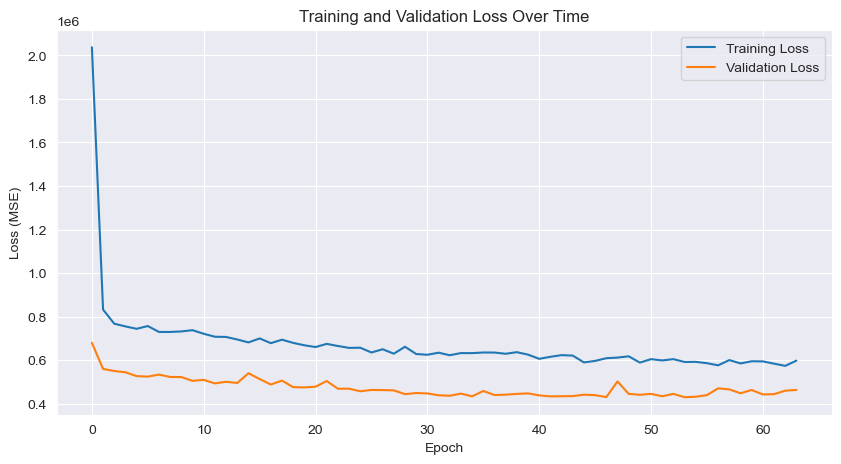

Mean Squared Error: 429685.0827916546
Mean Absolute Error: 387.2534376184666
R2 Score: 0.8418462170169927


In [288]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2  
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Label encode the Route column
label_encoder = LabelEncoder()
data['Route'] = label_encoder.fit_transform(data['Route'])

# Cyclic encode the Month, Day of the Week, and Week Number columns
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)

data['Day_of_Week_sin'] = np.sin(2 * np.pi * data['Day of the Week'] / 7)
data['Day_of_Week_cos'] = np.cos(2 * np.pi * data['Day of the Week'] / 7)

data['Week_Number_sin'] = np.sin(2 * np.pi * data['Week Number'] / 52)
data['Week_Number_cos'] = np.cos(2 * np.pi * data['Week Number'] / 52)

# Drop the original categorical columns
data = data.drop(columns=['Month', 'Day of the Week', 'Week Number'])

# Split into features and target
X = data.drop(columns=['MSW Wastage Amount (Kg)', 'Dump Date'])
y = data['MSW Wastage Amount (Kg)']

# Extract 'Route' column separately and other numerical features
X_route = X['Route'].values  
X_other = X.drop(columns=['Route']).values  

# Scale numerical features (excluding Route)
scaler = StandardScaler()
X_other_scaled = scaler.fit_transform(X_other)

# Split into training and testing sets
X_train_route, X_test_route, X_train_other, X_test_other, y_train, y_test = train_test_split(
    X_route, X_other_scaled, y, test_size=0.2, random_state=42
)

# Define the input layers
route_input = Input(shape=(1,), name="route_input")
other_input = Input(shape=(X_other.shape[1],), name="other_input")

# Embedding layer for the Route column
route_embedding = Embedding(
    input_dim=len(data['Route'].unique()),
    output_dim=20,
    name="route_embedding"
)(route_input)
route_embedding = Flatten()(route_embedding)

# Concatenate the embedding and the other features
concat = Concatenate(name="concatenated_features")([route_embedding, other_input])

# Define a regularizer for Dense layers 
regularizer = l2(0.001)

# Build fully connected layers with dropout and L2 regularization
x = Dense(256, activation='relu', kernel_regularizer=regularizer, name="dense_256")(concat)
x = Dropout(0.3, name="dropout_256")(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizer, name="dense_128")(x)
x = Dropout(0.3, name="dropout_128")(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizer, name="dense_64")(x)
x = Dropout(0.3, name="dropout_64")(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizer, name="dense_32")(x)
x = Dropout(0.3, name="dropout_32")(x)

# Output layer (for regression)
output = Dense(1, name="output")(x)

# Define the model
model = Model(inputs=[route_input, other_input], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Print the model summary
print(model.summary())

# Define Early Stopping callback: monitor validation loss with a patience of 10 epochs.
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model while tracking metrics over time
history = model.fit(
    [X_train_route, X_train_other],
    y_train,
    epochs=500,
    batch_size=32,
    validation_data=([X_test_route, X_test_other], y_test),
    callbacks=[early_stop]
)

# Evaluate the model on the test set
test_loss = model.evaluate([X_test_route, X_test_other], y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set
predictions = model.predict([X_test_route, X_test_other]).flatten()

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Plot training and validation loss over epochs to track metrics over time
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


In [ ]:
import joblib

# Save the model
model.save('/Users/chirath/Python/IIT/branch_testing/HouseHold/ml_model/MSW_model2.h5')

# Save the scaler
joblib.dump(scaler, '/Users/chirath/Python/IIT/branch_testing/HouseHold/ml_model/scaler2.pkl')

# Save the label encoder
joblib.dump(label_encoder, '/Users/chirath/Python/IIT/branch_testing/HouseHold/ml_model/label_encoder2.pkl')